## BLM442 Keşif aktivitesi-5: Makine Öğrenmesi

#### İsim/Soyisim: Mehmet Oğuz Aktaş
#### Öğrenci Numarası: 150201170
#### E-mail: oguzaktass@gmail.com
#### Kullanılan datasetlerin adı: Electrical Grid Stability Simulated Data, Countries of the World
#### Dataset1 url: https://archive.ics.uci.edu/ml/datasets/Electrical+Grid+Stability+Simulated+Data+
#### Dataset2 url: https://www.kaggle.com/fernandol/countries-of-the-world, https://people.sc.fsu.edu/~jburkardt/data/csv/hw_25000.csv

#### İntihal: 
Netten alınacak kısmi kod parçaları önceden kod içinde/raporda belirtilmek ve soru sorulduğunda cevaplanması durumunda sıkıntı çıkarmayacaktır. (i) Internet kaynağını belirtmeyen/açıklayamayan/üzerinde geliştirme yapmayan veya (ii) birbirleriyle benzer/aynı çalışma teslim edenlerin aktiviteleri sıfır üzerinden değerlendirilecektir.

#### KA-5 Gönderim şekli

1-pdf olarak "ogrenciNo.pdf" dokumanını gonderme
-calisma dosyasında (File -> Print Preview) sonrası olusan html dosyasını yazdır deyip pdf olarak kaydetme veya
-(File -> Download as -> HTML) seklinde indirip pdf'e cevirme http://html2pdf.com/

2-(File -> Download as -> Notebook) indirip "ogrenciNo.ipynb" dokumanını gonderme

suleyman.eken@kocaeli.edu.tr

#### Kısım 1 (Regresyon Analizi): Daha once kullanmıs oldugunuz (kesif aktivitesi 1 spreadsheet) veriseti üzerindeki kolonlar (Nümerik predictors ve nümerik cikti) arasındaki pozitif ve negatif korelasyonu bulunuz.  r veya R^2  değerlerini belirleyiniz.

[[136.35108456]]
Index(['Index', 'Height', 'Weight'], dtype='object')


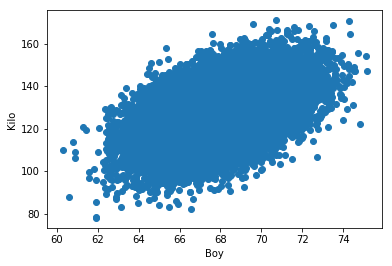

r-squared score:  0.2528666917428809


In [2]:
# NOT: Kullandigim contries-of-the-world datasetinde numeric degerlerde
# surekli farkli sorunlar ortaya ciktigi icin baska bir dataset kullandim.
# https://people.sc.fsu.edu/~jburkardt/data/csv/hw_25000.csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data = pd.read_csv("datasets/hw_25000.csv")

boy = data.Height.values.reshape(-1,1)
kilo = data.Weight.values.reshape(-1,1)

regression = LinearRegression()
regression.fit(boy, kilo)
print(regression.predict([[71]]))

print(data.columns)

plt.scatter(data.Height, data.Weight) # gorsellestirme
plt.xlabel("Boy")
plt.ylabel("Kilo")
plt.show()

# R^2 Score degeri
print("r-squared score: ", regression.score(boy, kilo))

#### Kısım 2 (Ekteki verisetlerinden biri üzerinde herhangi bir sınıflandırma algoritması gerçekleme) Sectiginiz verisetini Google Drive'da belirtiniz. Her kişi farklı veriseti seçmelidir. Veriseti üzerinde gerekiyorsa birtakım önişlemler yapılmalı, bir sınıflandırma modeli olusturularak modelin performansı çeşitli metriklerle sunulmalıdır.

https://docs.google.com/spreadsheets/d/19g8vDmC20FQGo2t-NQNb1MD6jwcJvfIJXwxl7vQCIlA/edit?usp=sharing

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix

# Secilen datasette ilk 8 kayit uzerinden Logistic Regression implemantasyonu yapildi,
# confusion matrix metrigi ile performansi gosterildi

data = pd.read_csv('datasets/Data_for_UCI_named.csv')

x = data.iloc[:,0:4].values # bagimsiz degiskenler
y = data.iloc[:,13:].values # bagimli degisken

# verilerin egitim ve test icin bolunmesi
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

# verilerin olceklenmesi
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

# logistic regression
logr = LogisticRegression(random_state=0)
logr.fit(X_train, y_train)

y_pred = logr.predict(X_test)
print("predictions: ")
print(y_pred[0:8]) # prediction'larin cikarilmasi
print()
print("gercek degerler: ")
print(y_test[0:8]) # gercek degerler
print()

# confusion matrix
print("confusion matrix: ")
confusionmatrix = confusion_matrix(y_test[0:8], y_pred[0:8])
print(confusionmatrix)

predictions: 
['stable' 'unstable' 'unstable' 'unstable' 'unstable' 'unstable'
 'unstable' 'unstable']

gercek degerler: 
[['unstable']
 ['stable']
 ['unstable']
 ['unstable']
 ['unstable']
 ['unstable']
 ['unstable']
 ['stable']]

confusion matrix: 
[[0 2]
 [1 5]]


/home/oguz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/oguz/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Kısım 3 (Dünya kupası verini kumeleme) Herhangi bir kümeleme yontemi ile kumelenmeli ve modelin performansı sunulmalıdır.

In [4]:
# K-Means Clustering yontemi kullanildi.

import pandas as pd

In [5]:
f = open('datasets/Players.csv','rU')
players = pd.read_csv(f)

/home/oguz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 'U' mode is deprecated
  """Entry point for launching an IPython kernel.


In [6]:
players.to_csv('datasets/oyuncu.csv') #kodları silmeden dataframe i kendi bilgisayarınıza kaydedebilirsiniz

In [7]:
from sklearn.cluster import KMeans

x = players.iloc[:,4:6].values # Sut ve Pas sayisi

[[  1.74788136  52.90254237]
 [  4.43902439 205.85365854]]


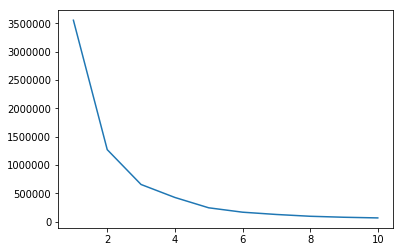

In [8]:
kmeans = KMeans(n_clusters=2, init='k-means++') # Pas ve sut sayisi olarak 2 merkez noktasi (n_clusters) verir.
kmeans.fit(x)

print(kmeans.cluster_centers_) # merkez noktalari

sonuclar = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=123)
    kmeans.fit(x)
    sonuclar.append(kmeans.inertia_)
    
plt.plot(range(1,11), sonuclar) # K-Means WCSS values

#### Yararlandığım kaynaklar;
https://www.kaggle.com/charlesxjyang/linear-regression-methods-w-0-95-r-2-score

https://www.youtube.com/watch?v=Dxf1I4IE6co

https://ipython-books.github.io/74-estimating-the-correlation-between-two-variables-with-a-contingency-table-and-a-chi-squared-test/

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

https://stackoverflow.com/questions/32370543/understanding-score-returned-by-scikit-learn-kmeans